# Mnist Data (Discovery Stage)

****DataTeam****: Responsible for discovering, collecting and preparing data
- *Steps*
    1. Import Scanflow and check the local environment
    2. Prepare the dataset
    3. Submit the dataset to the central Scanflow-tracker
- *Deliverables*
    1. DataTeam artifacts

## Steps
### Step1: Import Scanflow and check the local environment
1. import scanflow
    - For saving artifacts, we need to import ScanflowTrackerClient
2. check local environment
    - For saving deliverables, we need to configure url of central Scanflow-tracker on "SCANFLOW_TRACKER_URI"
    - If Scanflow-tracker is using S3 artifact storage, we need to configure S3 url "MLFLOW_S3_ENDPOINT_URL", username "AWS_ACCESS_KEY_ID" and password "AWS_SECRET_ACCESS_KEY"

In [1]:
import sys
import os
sys.path.insert(0,'../..')

import scanflow
from scanflow.client import ScanflowTrackerClient

In [2]:
from scanflow.tools import env
print(env.get_env("SCANFLOW_TRACKER_URI"))
print(env.get_env("MLFLOW_S3_ENDPOINT_URL"))
print(env.get_env("AWS_ACCESS_KEY_ID"))
print(env.get_env("AWS_SECRET_ACCESS_KEY"))

http://84.88.189.179:32766
http://84.88.189.179:32645
scanflow
scanflow123


### Step2: Prepare the dataset

```bash
  mnist
   - data
     - mnist
       - train_images.npy
       - train_labels.npy
       - test_images.npy
       - test_labels.npy
```



In [3]:
# App folder
scanflow_path = "/home/rocky/k8s_resources/scanflow"
app_dir = os.path.join(scanflow_path, "examples/mnist/data")
app_name = "mnist"
team_name = "data"

In [4]:
os.listdir(app_dir)

['mnist', 'mnist_c', 'mnist_sample']

In [5]:
os.listdir(f"{app_dir}/mnist")

['test_images.npy', 'test_labels.npy', 'train_images.npy', 'train_labels.npy']

 
### Step3: Submit dataset to Scanflow-Tracker
```bash
  mnist
   - data
     - mnist
       - train_images.npy
       - train_labels.npy
       - test_images.npy
       - test_labels.npy
```

In [6]:
# scanflow trackerclient
trackerclient = ScanflowTrackerClient(
                        #if you defined "SCANFLOW_TRACKER_URI", you dont need to provide this
                        #scanflow_tracker_uri="http://172.30.0.50:46667",
                        verbose=True)

10-Jan-24 11:42:25 -  INFO - Scanflow_tracker_local_uri is not provided


In [7]:
trackerclient.save_app_artifacts(app_name=app_name, 
                                team_name=team_name, 
                                app_dir=app_dir)

10-Jan-24 11:42:25 -  INFO - Connecting tracking server uri: http://84.88.189.179:32766
10-Jan-24 11:42:25 -  INFO - save app in /home/rocky/k8s_resources/scanflow/examples/mnist/data to artifact uri: s3://scanflow/1/2653366453e647e6bdbc78c913a5b68b/artifacts
10-Jan-24 11:42:25 -  INFO - Found credentials in environment variables.


## Deliverables
### Deliverable1: DataTeam artifacts

After steps, you could check the deliverable from the central Scanflow-tracker http://84.88.189.179:32766.

1. Figure1 shows the history runs submitted by DataTeam 
2. Figure2 shows the artifacts within a specific run

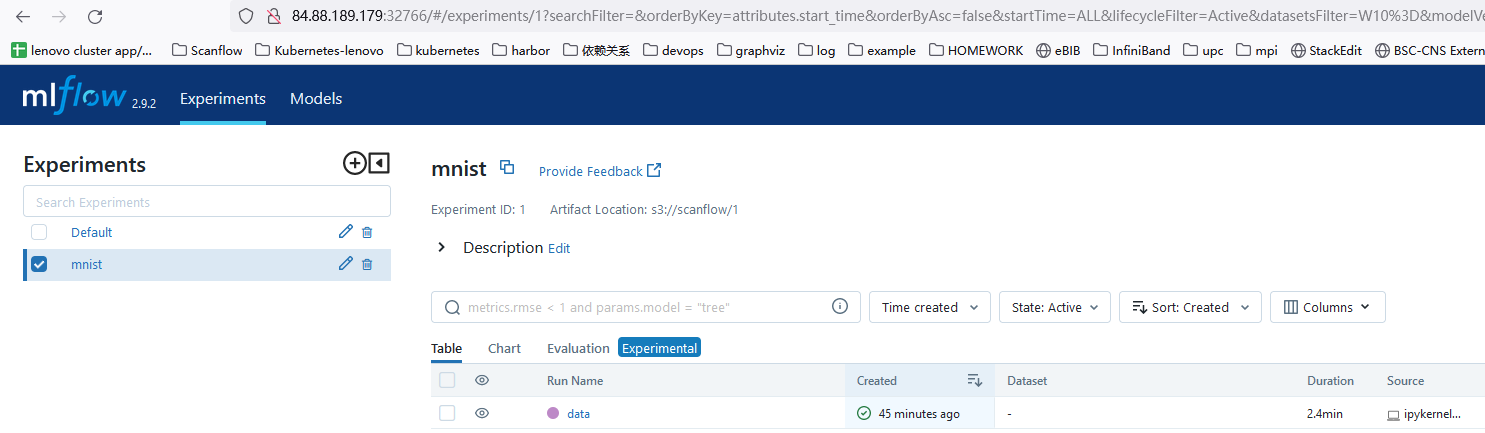

In [11]:
from IPython.display import Image
Image("/home/rocky/k8s_resources/scanflow/images/cloudskin/data-d1-1.png", width=1200, height=400)

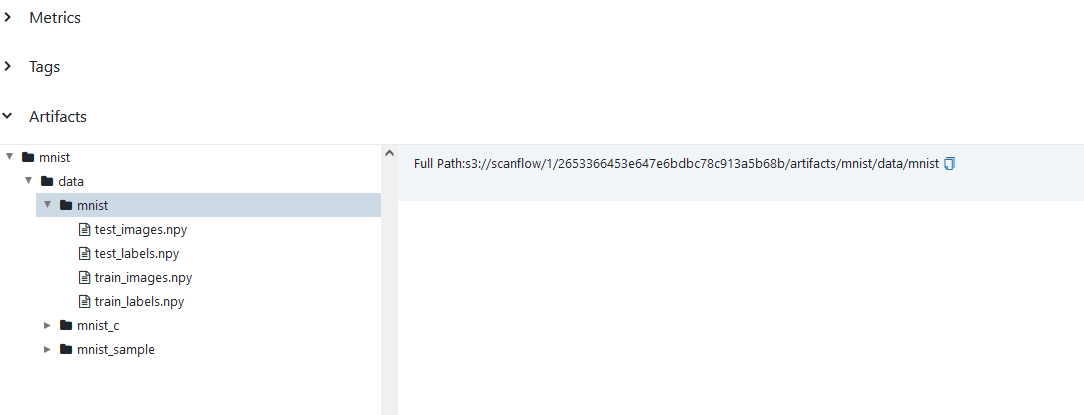

In [12]:
from IPython.display import Image
Image("/home/rocky/k8s_resources/scanflow/images/cloudskin/data-d1-2.png", width=1200, height=400)